## The purpose of this file
Solve the system of nonlinear equations to estimate nodes' activity level $\boldsymbol{\hat{a}}$.
$$
H_i(\boldsymbol{\hat{a}})\equiv\sum_{j:j\neq i}\frac{m_{ij}^o-\tau \hat{a_i}\hat{a_j}}{1-\hat{a_i}\hat{a_j}}=0, \forall\,i=1,...,N
$$

In [1]:
import sys
sys.path.append('../')
import numpy as np
import networkx as nx
import pandas as pd
import toolbox as tb
from scipy import optimize
%matplotlib inline

In [2]:
tag = "sweets"
hashtag = "スイーツ" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "22-22"
tau = 32
G = nx.read_graphml(f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml')

In [3]:
aam = nx.to_numpy_array(G)
n = len(aam)

In [4]:
def h(a):

    a = np.array(a)
    
    monomials = (aam - tau*(a.reshape(-1,1)@a.reshape(1,-1))) / (np.ones((n,n)) - (a.reshape(-1,1)@a.reshape(1,-1)))
    diag_ = np.diag_indices(n)
    monomials[diag_] = 0
    
    poly = monomials.sum(axis=1)
    return poly

In [5]:
# Initial value is given by a config model
a_init = tb.initial_value(aam, tau)
aam_mean = (aam/tau).mean(axis=1)

In [6]:
%%time
krylov_ai = optimize.root(h, a_init, method = "krylov")

CPU times: total: 42.2 s
Wall time: 42.3 s


In [7]:
%%time
broyden1_ai = optimize.root(h, a_init, method = "broyden1")

CPU times: total: 2min 8s
Wall time: 2min 9s


In [ ]:
%%time
arbitrary = np.array([0.001 for _ in range(n)])
#krylov_m = optimize.root(h, aam_mean, method = "krylov")
krylov_m = optimize.root(h, arbitrary, method = "krylov")

In [10]:
tb.show_opt_result(krylov_ai, 'Newton-Krylov 法')
print()
#tb.show_opt_result(krylov_m, 'Newton-Krylov 法（初期値変更）')
print()
tb.show_opt_result(broyden1_ai, 'good Broyden 法')

Newton-Krylov 法
success? : True
estimate : [0.02613909 0.00273596 0.00273596 ... 0.00121577 0.00121577 0.00060805]
missing value : 0
min : 0.0003039521486801517
max : 0.9825218604605763
maximum connection Prob u(a_i,a_j):0.8596233518703913
index of maximum value : (159, 205)


good Broyden 法
success? : True
estimate : [0.02613909 0.00273596 0.00273596 ... 0.00121577 0.00121577 0.00060805]
missing value : 0
min : 0.0003039521487512973
max : 0.9825218603822058
maximum connection Prob u(a_i,a_j):0.8596233517988392
index of maximum value : (159, 205)


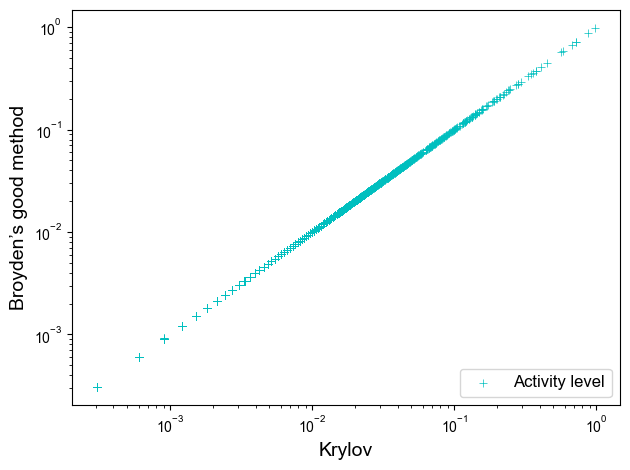

In [11]:
fname1 = f"../data/figure/estimates/estimates_{tag}_{timespan}_{tau}_scatter.pdf"
tb.plot_a_hat(krylov_ai, broyden1_ai, alpha=1, sep=False, fname=fname1)

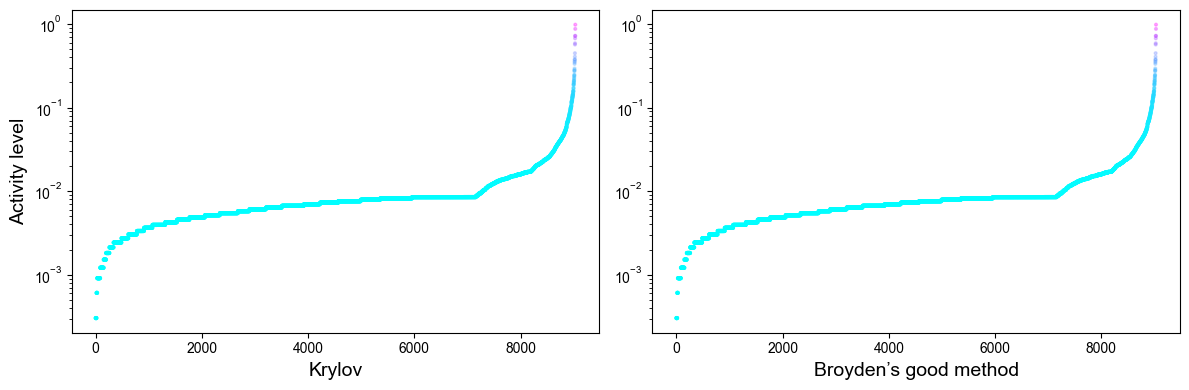

In [12]:
fname2 = f"../data/figure/estimates/estimates_{tag}_{timespan}_{tau}.pdf"
tb.plot_a_hat(krylov_ai, broyden1_ai, sep=True, fname=fname2)

In [ ]:
# for different initial guess
fname3 = f"../data/figure/estimates/estimates_{tag}_{timespan}_{tau}_init.pdf"
tb.plot_a_hat_match(krylov_ai, krylov_m, "Configuration model", "0.001", fname=fname3)

In [13]:
fn_krylov = f'../data/ML_estimate/{tag}/{timespan}_{tau}_krylov'
fn_broyden = f'../data/ML_estimate/{tag}/{timespan}_{tau}_broyden1'
fn_init = f'../data/ML_estimate/{tag}/{timespan}_{tau}_init'
print(fn_krylov)
print(fn_broyden)
print(fn_init)
tb.save_opt_result(krylov_ai, fn_krylov)
#tb.save_opt_result(broyden1_ai, fn_broyden)
#tb.save_opt_result(krylov_m, fn_init)

../data/ML_estimate/sweets/22-22_32_krylov
../data/ML_estimate/sweets/22-22_32_broyden1
../data/ML_estimate/sweets/22-22_32_init
